In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score as aps
from sklearn.metrics import roc_auc_score as auc

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
feature_list = list(df.columns)
feature_list.remove('ID_code')
feature_list.remove('target')

X = df[feature_list].values
y = df['target'].values

In [7]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.2)

In [8]:
import lightgbm as lgb

In [9]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

lgbm_params = {
    'objective': 'binary',
    'is_unbalance': True,
    'num_leaves': 24,
}

# 上記のパラメータでモデルを学習する
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_val, num_boost_round=10000) # 2800

[1]	valid_0's binary_logloss: 0.327775
[2]	valid_0's binary_logloss: 0.339516
[3]	valid_0's binary_logloss: 0.354437
[4]	valid_0's binary_logloss: 0.369398
[5]	valid_0's binary_logloss: 0.384395
[6]	valid_0's binary_logloss: 0.399752
[7]	valid_0's binary_logloss: 0.413395
[8]	valid_0's binary_logloss: 0.426516
[9]	valid_0's binary_logloss: 0.438597
[10]	valid_0's binary_logloss: 0.449091
[11]	valid_0's binary_logloss: 0.459633
[12]	valid_0's binary_logloss: 0.469252
[13]	valid_0's binary_logloss: 0.477077
[14]	valid_0's binary_logloss: 0.484389
[15]	valid_0's binary_logloss: 0.490712
[16]	valid_0's binary_logloss: 0.496762
[17]	valid_0's binary_logloss: 0.501696
[18]	valid_0's binary_logloss: 0.50634
[19]	valid_0's binary_logloss: 0.510206
[20]	valid_0's binary_logloss: 0.513777
[21]	valid_0's binary_logloss: 0.517027
[22]	valid_0's binary_logloss: 0.519449
[23]	valid_0's binary_logloss: 0.521337
[24]	valid_0's binary_logloss: 0.522724
[25]	valid_0's binary_logloss: 0.523674
[26]	valid

[205]	valid_0's binary_logloss: 0.372541
[206]	valid_0's binary_logloss: 0.372127
[207]	valid_0's binary_logloss: 0.371636
[208]	valid_0's binary_logloss: 0.371203
[209]	valid_0's binary_logloss: 0.37088
[210]	valid_0's binary_logloss: 0.370415
[211]	valid_0's binary_logloss: 0.370013
[212]	valid_0's binary_logloss: 0.369617
[213]	valid_0's binary_logloss: 0.369214
[214]	valid_0's binary_logloss: 0.36876
[215]	valid_0's binary_logloss: 0.36834
[216]	valid_0's binary_logloss: 0.367966
[217]	valid_0's binary_logloss: 0.367542
[218]	valid_0's binary_logloss: 0.36717
[219]	valid_0's binary_logloss: 0.366652
[220]	valid_0's binary_logloss: 0.366254
[221]	valid_0's binary_logloss: 0.365851
[222]	valid_0's binary_logloss: 0.365465
[223]	valid_0's binary_logloss: 0.365097
[224]	valid_0's binary_logloss: 0.364698
[225]	valid_0's binary_logloss: 0.364254
[226]	valid_0's binary_logloss: 0.363809
[227]	valid_0's binary_logloss: 0.363283
[228]	valid_0's binary_logloss: 0.362847
[229]	valid_0's bina

[409]	valid_0's binary_logloss: 0.313763
[410]	valid_0's binary_logloss: 0.31356
[411]	valid_0's binary_logloss: 0.313414
[412]	valid_0's binary_logloss: 0.313294
[413]	valid_0's binary_logloss: 0.313108
[414]	valid_0's binary_logloss: 0.312985
[415]	valid_0's binary_logloss: 0.312883
[416]	valid_0's binary_logloss: 0.312729
[417]	valid_0's binary_logloss: 0.312536
[418]	valid_0's binary_logloss: 0.312381
[419]	valid_0's binary_logloss: 0.31219
[420]	valid_0's binary_logloss: 0.311959
[421]	valid_0's binary_logloss: 0.311701
[422]	valid_0's binary_logloss: 0.311538
[423]	valid_0's binary_logloss: 0.311456
[424]	valid_0's binary_logloss: 0.311337
[425]	valid_0's binary_logloss: 0.311129
[426]	valid_0's binary_logloss: 0.311
[427]	valid_0's binary_logloss: 0.310824
[428]	valid_0's binary_logloss: 0.310641
[429]	valid_0's binary_logloss: 0.310502
[430]	valid_0's binary_logloss: 0.310347
[431]	valid_0's binary_logloss: 0.310197
[432]	valid_0's binary_logloss: 0.310066
[433]	valid_0's binar

[610]	valid_0's binary_logloss: 0.287718
[611]	valid_0's binary_logloss: 0.287595
[612]	valid_0's binary_logloss: 0.287502
[613]	valid_0's binary_logloss: 0.287405
[614]	valid_0's binary_logloss: 0.287311
[615]	valid_0's binary_logloss: 0.287222
[616]	valid_0's binary_logloss: 0.287129
[617]	valid_0's binary_logloss: 0.286975
[618]	valid_0's binary_logloss: 0.286853
[619]	valid_0's binary_logloss: 0.286767
[620]	valid_0's binary_logloss: 0.286653
[621]	valid_0's binary_logloss: 0.286524
[622]	valid_0's binary_logloss: 0.286409
[623]	valid_0's binary_logloss: 0.286277
[624]	valid_0's binary_logloss: 0.286177
[625]	valid_0's binary_logloss: 0.286063
[626]	valid_0's binary_logloss: 0.285873
[627]	valid_0's binary_logloss: 0.285754
[628]	valid_0's binary_logloss: 0.285605
[629]	valid_0's binary_logloss: 0.285568
[630]	valid_0's binary_logloss: 0.28551
[631]	valid_0's binary_logloss: 0.285416
[632]	valid_0's binary_logloss: 0.28537
[633]	valid_0's binary_logloss: 0.28529
[634]	valid_0's bin

[812]	valid_0's binary_logloss: 0.269153
[813]	valid_0's binary_logloss: 0.269043
[814]	valid_0's binary_logloss: 0.268977
[815]	valid_0's binary_logloss: 0.268903
[816]	valid_0's binary_logloss: 0.268847
[817]	valid_0's binary_logloss: 0.268755
[818]	valid_0's binary_logloss: 0.268659
[819]	valid_0's binary_logloss: 0.268575
[820]	valid_0's binary_logloss: 0.268506
[821]	valid_0's binary_logloss: 0.268439
[822]	valid_0's binary_logloss: 0.268352
[823]	valid_0's binary_logloss: 0.268282
[824]	valid_0's binary_logloss: 0.268184
[825]	valid_0's binary_logloss: 0.268095
[826]	valid_0's binary_logloss: 0.268064
[827]	valid_0's binary_logloss: 0.268
[828]	valid_0's binary_logloss: 0.267931
[829]	valid_0's binary_logloss: 0.267833
[830]	valid_0's binary_logloss: 0.267765
[831]	valid_0's binary_logloss: 0.267714
[832]	valid_0's binary_logloss: 0.267653
[833]	valid_0's binary_logloss: 0.267571
[834]	valid_0's binary_logloss: 0.267502
[835]	valid_0's binary_logloss: 0.267396
[836]	valid_0's bin

[1015]	valid_0's binary_logloss: 0.255538
[1016]	valid_0's binary_logloss: 0.255487
[1017]	valid_0's binary_logloss: 0.255442
[1018]	valid_0's binary_logloss: 0.255363
[1019]	valid_0's binary_logloss: 0.255331
[1020]	valid_0's binary_logloss: 0.255236
[1021]	valid_0's binary_logloss: 0.255179
[1022]	valid_0's binary_logloss: 0.255138
[1023]	valid_0's binary_logloss: 0.255064
[1024]	valid_0's binary_logloss: 0.255004
[1025]	valid_0's binary_logloss: 0.254907
[1026]	valid_0's binary_logloss: 0.25486
[1027]	valid_0's binary_logloss: 0.254784
[1028]	valid_0's binary_logloss: 0.254753
[1029]	valid_0's binary_logloss: 0.254704
[1030]	valid_0's binary_logloss: 0.254633
[1031]	valid_0's binary_logloss: 0.254566
[1032]	valid_0's binary_logloss: 0.254508
[1033]	valid_0's binary_logloss: 0.254468
[1034]	valid_0's binary_logloss: 0.254355
[1035]	valid_0's binary_logloss: 0.254323
[1036]	valid_0's binary_logloss: 0.254286
[1037]	valid_0's binary_logloss: 0.254292
[1038]	valid_0's binary_logloss: 0.

[1212]	valid_0's binary_logloss: 0.245433
[1213]	valid_0's binary_logloss: 0.245358
[1214]	valid_0's binary_logloss: 0.245303
[1215]	valid_0's binary_logloss: 0.245255
[1216]	valid_0's binary_logloss: 0.245184
[1217]	valid_0's binary_logloss: 0.245122
[1218]	valid_0's binary_logloss: 0.245068
[1219]	valid_0's binary_logloss: 0.245031
[1220]	valid_0's binary_logloss: 0.245021
[1221]	valid_0's binary_logloss: 0.244951
[1222]	valid_0's binary_logloss: 0.244917
[1223]	valid_0's binary_logloss: 0.2449
[1224]	valid_0's binary_logloss: 0.244851
[1225]	valid_0's binary_logloss: 0.244851
[1226]	valid_0's binary_logloss: 0.244808
[1227]	valid_0's binary_logloss: 0.244757
[1228]	valid_0's binary_logloss: 0.244705
[1229]	valid_0's binary_logloss: 0.244672
[1230]	valid_0's binary_logloss: 0.244647
[1231]	valid_0's binary_logloss: 0.244593
[1232]	valid_0's binary_logloss: 0.244556
[1233]	valid_0's binary_logloss: 0.244491
[1234]	valid_0's binary_logloss: 0.244462
[1235]	valid_0's binary_logloss: 0.2

[1411]	valid_0's binary_logloss: 0.237806
[1412]	valid_0's binary_logloss: 0.2378
[1413]	valid_0's binary_logloss: 0.237803
[1414]	valid_0's binary_logloss: 0.237745
[1415]	valid_0's binary_logloss: 0.237728
[1416]	valid_0's binary_logloss: 0.237731
[1417]	valid_0's binary_logloss: 0.237672
[1418]	valid_0's binary_logloss: 0.237641
[1419]	valid_0's binary_logloss: 0.237613
[1420]	valid_0's binary_logloss: 0.237618
[1421]	valid_0's binary_logloss: 0.237587
[1422]	valid_0's binary_logloss: 0.237568
[1423]	valid_0's binary_logloss: 0.237559
[1424]	valid_0's binary_logloss: 0.237476
[1425]	valid_0's binary_logloss: 0.237456
[1426]	valid_0's binary_logloss: 0.237404
[1427]	valid_0's binary_logloss: 0.237382
[1428]	valid_0's binary_logloss: 0.237358
[1429]	valid_0's binary_logloss: 0.23735
[1430]	valid_0's binary_logloss: 0.237311
[1431]	valid_0's binary_logloss: 0.237282
[1432]	valid_0's binary_logloss: 0.237232
[1433]	valid_0's binary_logloss: 0.237253
[1434]	valid_0's binary_logloss: 0.23

[1607]	valid_0's binary_logloss: 0.232169
[1608]	valid_0's binary_logloss: 0.232142
[1609]	valid_0's binary_logloss: 0.232142
[1610]	valid_0's binary_logloss: 0.232117
[1611]	valid_0's binary_logloss: 0.232116
[1612]	valid_0's binary_logloss: 0.232076
[1613]	valid_0's binary_logloss: 0.23207
[1614]	valid_0's binary_logloss: 0.23201
[1615]	valid_0's binary_logloss: 0.231992
[1616]	valid_0's binary_logloss: 0.231984
[1617]	valid_0's binary_logloss: 0.231955
[1618]	valid_0's binary_logloss: 0.231943
[1619]	valid_0's binary_logloss: 0.231911
[1620]	valid_0's binary_logloss: 0.231896
[1621]	valid_0's binary_logloss: 0.231885
[1622]	valid_0's binary_logloss: 0.231865
[1623]	valid_0's binary_logloss: 0.231854
[1624]	valid_0's binary_logloss: 0.231801
[1625]	valid_0's binary_logloss: 0.231772
[1626]	valid_0's binary_logloss: 0.231753
[1627]	valid_0's binary_logloss: 0.231724
[1628]	valid_0's binary_logloss: 0.23169
[1629]	valid_0's binary_logloss: 0.231665
[1630]	valid_0's binary_logloss: 0.23

[1805]	valid_0's binary_logloss: 0.228763
[1806]	valid_0's binary_logloss: 0.22874
[1807]	valid_0's binary_logloss: 0.228738
[1808]	valid_0's binary_logloss: 0.228687
[1809]	valid_0's binary_logloss: 0.228646
[1810]	valid_0's binary_logloss: 0.228637
[1811]	valid_0's binary_logloss: 0.228635
[1812]	valid_0's binary_logloss: 0.228577
[1813]	valid_0's binary_logloss: 0.228565
[1814]	valid_0's binary_logloss: 0.228561
[1815]	valid_0's binary_logloss: 0.228535
[1816]	valid_0's binary_logloss: 0.228488
[1817]	valid_0's binary_logloss: 0.228485
[1818]	valid_0's binary_logloss: 0.22847
[1819]	valid_0's binary_logloss: 0.228452
[1820]	valid_0's binary_logloss: 0.228422
[1821]	valid_0's binary_logloss: 0.228454
[1822]	valid_0's binary_logloss: 0.228402
[1823]	valid_0's binary_logloss: 0.228409
[1824]	valid_0's binary_logloss: 0.228377
[1825]	valid_0's binary_logloss: 0.228394
[1826]	valid_0's binary_logloss: 0.228383
[1827]	valid_0's binary_logloss: 0.228337
[1828]	valid_0's binary_logloss: 0.2

[2003]	valid_0's binary_logloss: 0.226852
[2004]	valid_0's binary_logloss: 0.226847
[2005]	valid_0's binary_logloss: 0.226827
[2006]	valid_0's binary_logloss: 0.226871
[2007]	valid_0's binary_logloss: 0.226855
[2008]	valid_0's binary_logloss: 0.226834
[2009]	valid_0's binary_logloss: 0.226826
[2010]	valid_0's binary_logloss: 0.226825
[2011]	valid_0's binary_logloss: 0.226803
[2012]	valid_0's binary_logloss: 0.226815
[2013]	valid_0's binary_logloss: 0.226815
[2014]	valid_0's binary_logloss: 0.22679
[2015]	valid_0's binary_logloss: 0.226781
[2016]	valid_0's binary_logloss: 0.226787
[2017]	valid_0's binary_logloss: 0.226781
[2018]	valid_0's binary_logloss: 0.226744
[2019]	valid_0's binary_logloss: 0.226782
[2020]	valid_0's binary_logloss: 0.22677
[2021]	valid_0's binary_logloss: 0.226792
[2022]	valid_0's binary_logloss: 0.226801
[2023]	valid_0's binary_logloss: 0.226792
[2024]	valid_0's binary_logloss: 0.226768
[2025]	valid_0's binary_logloss: 0.226779
[2026]	valid_0's binary_logloss: 0.2

[2202]	valid_0's binary_logloss: 0.22577
[2203]	valid_0's binary_logloss: 0.225776
[2204]	valid_0's binary_logloss: 0.22579
[2205]	valid_0's binary_logloss: 0.225798
[2206]	valid_0's binary_logloss: 0.225803
[2207]	valid_0's binary_logloss: 0.225822
[2208]	valid_0's binary_logloss: 0.225836
[2209]	valid_0's binary_logloss: 0.225831
[2210]	valid_0's binary_logloss: 0.225812
[2211]	valid_0's binary_logloss: 0.225793
[2212]	valid_0's binary_logloss: 0.225807
[2213]	valid_0's binary_logloss: 0.22575
[2214]	valid_0's binary_logloss: 0.225734
[2215]	valid_0's binary_logloss: 0.225721
[2216]	valid_0's binary_logloss: 0.225743
[2217]	valid_0's binary_logloss: 0.225737
[2218]	valid_0's binary_logloss: 0.225758
[2219]	valid_0's binary_logloss: 0.225752
[2220]	valid_0's binary_logloss: 0.225752
[2221]	valid_0's binary_logloss: 0.225731
[2222]	valid_0's binary_logloss: 0.22575
[2223]	valid_0's binary_logloss: 0.225762
[2224]	valid_0's binary_logloss: 0.225759
[2225]	valid_0's binary_logloss: 0.225

[2402]	valid_0's binary_logloss: 0.226081
[2403]	valid_0's binary_logloss: 0.226093
[2404]	valid_0's binary_logloss: 0.226076
[2405]	valid_0's binary_logloss: 0.226112
[2406]	valid_0's binary_logloss: 0.226116
[2407]	valid_0's binary_logloss: 0.226082
[2408]	valid_0's binary_logloss: 0.226118
[2409]	valid_0's binary_logloss: 0.226124
[2410]	valid_0's binary_logloss: 0.226114
[2411]	valid_0's binary_logloss: 0.226134
[2412]	valid_0's binary_logloss: 0.226138
[2413]	valid_0's binary_logloss: 0.226141
[2414]	valid_0's binary_logloss: 0.226109
[2415]	valid_0's binary_logloss: 0.226142
[2416]	valid_0's binary_logloss: 0.226185
[2417]	valid_0's binary_logloss: 0.226217
[2418]	valid_0's binary_logloss: 0.226203
[2419]	valid_0's binary_logloss: 0.226248
[2420]	valid_0's binary_logloss: 0.226276
[2421]	valid_0's binary_logloss: 0.226286
[2422]	valid_0's binary_logloss: 0.226273
[2423]	valid_0's binary_logloss: 0.226249
[2424]	valid_0's binary_logloss: 0.226257
[2425]	valid_0's binary_logloss: 0

[2600]	valid_0's binary_logloss: 0.227292
[2601]	valid_0's binary_logloss: 0.227288
[2602]	valid_0's binary_logloss: 0.227274
[2603]	valid_0's binary_logloss: 0.227274
[2604]	valid_0's binary_logloss: 0.227317
[2605]	valid_0's binary_logloss: 0.22733
[2606]	valid_0's binary_logloss: 0.227314
[2607]	valid_0's binary_logloss: 0.227318
[2608]	valid_0's binary_logloss: 0.227326
[2609]	valid_0's binary_logloss: 0.227313
[2610]	valid_0's binary_logloss: 0.227315
[2611]	valid_0's binary_logloss: 0.227308
[2612]	valid_0's binary_logloss: 0.227327
[2613]	valid_0's binary_logloss: 0.227309
[2614]	valid_0's binary_logloss: 0.227316
[2615]	valid_0's binary_logloss: 0.227341
[2616]	valid_0's binary_logloss: 0.227371
[2617]	valid_0's binary_logloss: 0.227407
[2618]	valid_0's binary_logloss: 0.22742
[2619]	valid_0's binary_logloss: 0.227396
[2620]	valid_0's binary_logloss: 0.227429
[2621]	valid_0's binary_logloss: 0.227455
[2622]	valid_0's binary_logloss: 0.227474
[2623]	valid_0's binary_logloss: 0.2

[2799]	valid_0's binary_logloss: 0.229365
[2800]	valid_0's binary_logloss: 0.229375
[2801]	valid_0's binary_logloss: 0.229395
[2802]	valid_0's binary_logloss: 0.229409
[2803]	valid_0's binary_logloss: 0.229432
[2804]	valid_0's binary_logloss: 0.229447
[2805]	valid_0's binary_logloss: 0.229415
[2806]	valid_0's binary_logloss: 0.229416
[2807]	valid_0's binary_logloss: 0.229425
[2808]	valid_0's binary_logloss: 0.229415
[2809]	valid_0's binary_logloss: 0.229412
[2810]	valid_0's binary_logloss: 0.22944
[2811]	valid_0's binary_logloss: 0.229469
[2812]	valid_0's binary_logloss: 0.229476
[2813]	valid_0's binary_logloss: 0.229488
[2814]	valid_0's binary_logloss: 0.229481
[2815]	valid_0's binary_logloss: 0.229515
[2816]	valid_0's binary_logloss: 0.229553
[2817]	valid_0's binary_logloss: 0.229589
[2818]	valid_0's binary_logloss: 0.229617
[2819]	valid_0's binary_logloss: 0.22963
[2820]	valid_0's binary_logloss: 0.229608
[2821]	valid_0's binary_logloss: 0.229614
[2822]	valid_0's binary_logloss: 0.2

[2998]	valid_0's binary_logloss: 0.231792
[2999]	valid_0's binary_logloss: 0.231818
[3000]	valid_0's binary_logloss: 0.231829
[3001]	valid_0's binary_logloss: 0.231855
[3002]	valid_0's binary_logloss: 0.231885
[3003]	valid_0's binary_logloss: 0.231911
[3004]	valid_0's binary_logloss: 0.231916
[3005]	valid_0's binary_logloss: 0.231935
[3006]	valid_0's binary_logloss: 0.231918
[3007]	valid_0's binary_logloss: 0.231913
[3008]	valid_0's binary_logloss: 0.231935
[3009]	valid_0's binary_logloss: 0.231958
[3010]	valid_0's binary_logloss: 0.232002
[3011]	valid_0's binary_logloss: 0.232013
[3012]	valid_0's binary_logloss: 0.23202
[3013]	valid_0's binary_logloss: 0.232023
[3014]	valid_0's binary_logloss: 0.232047
[3015]	valid_0's binary_logloss: 0.232063
[3016]	valid_0's binary_logloss: 0.232096
[3017]	valid_0's binary_logloss: 0.23207
[3018]	valid_0's binary_logloss: 0.232096
[3019]	valid_0's binary_logloss: 0.232106
[3020]	valid_0's binary_logloss: 0.232128
[3021]	valid_0's binary_logloss: 0.2

[3198]	valid_0's binary_logloss: 0.235044
[3199]	valid_0's binary_logloss: 0.23506
[3200]	valid_0's binary_logloss: 0.235068
[3201]	valid_0's binary_logloss: 0.235082
[3202]	valid_0's binary_logloss: 0.235111
[3203]	valid_0's binary_logloss: 0.23513
[3204]	valid_0's binary_logloss: 0.235127
[3205]	valid_0's binary_logloss: 0.235169
[3206]	valid_0's binary_logloss: 0.235175
[3207]	valid_0's binary_logloss: 0.23521
[3208]	valid_0's binary_logloss: 0.235231
[3209]	valid_0's binary_logloss: 0.235272
[3210]	valid_0's binary_logloss: 0.235295
[3211]	valid_0's binary_logloss: 0.235284
[3212]	valid_0's binary_logloss: 0.235331
[3213]	valid_0's binary_logloss: 0.235376
[3214]	valid_0's binary_logloss: 0.235384
[3215]	valid_0's binary_logloss: 0.235405
[3216]	valid_0's binary_logloss: 0.235394
[3217]	valid_0's binary_logloss: 0.235375
[3218]	valid_0's binary_logloss: 0.235387
[3219]	valid_0's binary_logloss: 0.235423
[3220]	valid_0's binary_logloss: 0.235456
[3221]	valid_0's binary_logloss: 0.23

[3398]	valid_0's binary_logloss: 0.238529
[3399]	valid_0's binary_logloss: 0.238566
[3400]	valid_0's binary_logloss: 0.238576
[3401]	valid_0's binary_logloss: 0.238578
[3402]	valid_0's binary_logloss: 0.238622
[3403]	valid_0's binary_logloss: 0.238621
[3404]	valid_0's binary_logloss: 0.238608
[3405]	valid_0's binary_logloss: 0.238617
[3406]	valid_0's binary_logloss: 0.238627
[3407]	valid_0's binary_logloss: 0.238595
[3408]	valid_0's binary_logloss: 0.238611
[3409]	valid_0's binary_logloss: 0.238638
[3410]	valid_0's binary_logloss: 0.238651
[3411]	valid_0's binary_logloss: 0.23868
[3412]	valid_0's binary_logloss: 0.238676
[3413]	valid_0's binary_logloss: 0.238706
[3414]	valid_0's binary_logloss: 0.238714
[3415]	valid_0's binary_logloss: 0.238719
[3416]	valid_0's binary_logloss: 0.238746
[3417]	valid_0's binary_logloss: 0.238773
[3418]	valid_0's binary_logloss: 0.238767
[3419]	valid_0's binary_logloss: 0.238794
[3420]	valid_0's binary_logloss: 0.238823
[3421]	valid_0's binary_logloss: 0.

[3597]	valid_0's binary_logloss: 0.242257
[3598]	valid_0's binary_logloss: 0.242274
[3599]	valid_0's binary_logloss: 0.242305
[3600]	valid_0's binary_logloss: 0.242335
[3601]	valid_0's binary_logloss: 0.242356
[3602]	valid_0's binary_logloss: 0.242418
[3603]	valid_0's binary_logloss: 0.242451
[3604]	valid_0's binary_logloss: 0.242459
[3605]	valid_0's binary_logloss: 0.242482
[3606]	valid_0's binary_logloss: 0.242527
[3607]	valid_0's binary_logloss: 0.242555
[3608]	valid_0's binary_logloss: 0.242594
[3609]	valid_0's binary_logloss: 0.242622
[3610]	valid_0's binary_logloss: 0.24264
[3611]	valid_0's binary_logloss: 0.242638
[3612]	valid_0's binary_logloss: 0.242706
[3613]	valid_0's binary_logloss: 0.242774
[3614]	valid_0's binary_logloss: 0.242812
[3615]	valid_0's binary_logloss: 0.242846
[3616]	valid_0's binary_logloss: 0.242851
[3617]	valid_0's binary_logloss: 0.242881
[3618]	valid_0's binary_logloss: 0.242889
[3619]	valid_0's binary_logloss: 0.242875
[3620]	valid_0's binary_logloss: 0.

[3794]	valid_0's binary_logloss: 0.246546
[3795]	valid_0's binary_logloss: 0.246584
[3796]	valid_0's binary_logloss: 0.246631
[3797]	valid_0's binary_logloss: 0.246652
[3798]	valid_0's binary_logloss: 0.24669
[3799]	valid_0's binary_logloss: 0.246702
[3800]	valid_0's binary_logloss: 0.246725
[3801]	valid_0's binary_logloss: 0.24674
[3802]	valid_0's binary_logloss: 0.246741
[3803]	valid_0's binary_logloss: 0.246754
[3804]	valid_0's binary_logloss: 0.246733
[3805]	valid_0's binary_logloss: 0.246772
[3806]	valid_0's binary_logloss: 0.246795
[3807]	valid_0's binary_logloss: 0.246831
[3808]	valid_0's binary_logloss: 0.246868
[3809]	valid_0's binary_logloss: 0.246933
[3810]	valid_0's binary_logloss: 0.246951
[3811]	valid_0's binary_logloss: 0.246983
[3812]	valid_0's binary_logloss: 0.246989
[3813]	valid_0's binary_logloss: 0.24701
[3814]	valid_0's binary_logloss: 0.247023
[3815]	valid_0's binary_logloss: 0.247041
[3816]	valid_0's binary_logloss: 0.247042
[3817]	valid_0's binary_logloss: 0.24

[3993]	valid_0's binary_logloss: 0.251086
[3994]	valid_0's binary_logloss: 0.251096
[3995]	valid_0's binary_logloss: 0.251091
[3996]	valid_0's binary_logloss: 0.251115
[3997]	valid_0's binary_logloss: 0.251172
[3998]	valid_0's binary_logloss: 0.251197
[3999]	valid_0's binary_logloss: 0.251191
[4000]	valid_0's binary_logloss: 0.251221
[4001]	valid_0's binary_logloss: 0.25124
[4002]	valid_0's binary_logloss: 0.251286
[4003]	valid_0's binary_logloss: 0.251308
[4004]	valid_0's binary_logloss: 0.251327
[4005]	valid_0's binary_logloss: 0.251339
[4006]	valid_0's binary_logloss: 0.251367
[4007]	valid_0's binary_logloss: 0.251366
[4008]	valid_0's binary_logloss: 0.251358
[4009]	valid_0's binary_logloss: 0.251405
[4010]	valid_0's binary_logloss: 0.251402
[4011]	valid_0's binary_logloss: 0.251422
[4012]	valid_0's binary_logloss: 0.251413
[4013]	valid_0's binary_logloss: 0.251443
[4014]	valid_0's binary_logloss: 0.25145
[4015]	valid_0's binary_logloss: 0.251466
[4016]	valid_0's binary_logloss: 0.2

[4189]	valid_0's binary_logloss: 0.255775
[4190]	valid_0's binary_logloss: 0.255787
[4191]	valid_0's binary_logloss: 0.255794
[4192]	valid_0's binary_logloss: 0.255804
[4193]	valid_0's binary_logloss: 0.255847
[4194]	valid_0's binary_logloss: 0.255891
[4195]	valid_0's binary_logloss: 0.255913
[4196]	valid_0's binary_logloss: 0.255897
[4197]	valid_0's binary_logloss: 0.255926
[4198]	valid_0's binary_logloss: 0.255964
[4199]	valid_0's binary_logloss: 0.256034
[4200]	valid_0's binary_logloss: 0.256048
[4201]	valid_0's binary_logloss: 0.256054
[4202]	valid_0's binary_logloss: 0.256059
[4203]	valid_0's binary_logloss: 0.256057
[4204]	valid_0's binary_logloss: 0.256086
[4205]	valid_0's binary_logloss: 0.256102
[4206]	valid_0's binary_logloss: 0.256132
[4207]	valid_0's binary_logloss: 0.256171
[4208]	valid_0's binary_logloss: 0.256195
[4209]	valid_0's binary_logloss: 0.256214
[4210]	valid_0's binary_logloss: 0.256243
[4211]	valid_0's binary_logloss: 0.256255
[4212]	valid_0's binary_logloss: 0

[4388]	valid_0's binary_logloss: 0.260989
[4389]	valid_0's binary_logloss: 0.261014
[4390]	valid_0's binary_logloss: 0.261032
[4391]	valid_0's binary_logloss: 0.261036
[4392]	valid_0's binary_logloss: 0.261057
[4393]	valid_0's binary_logloss: 0.261099
[4394]	valid_0's binary_logloss: 0.261134
[4395]	valid_0's binary_logloss: 0.261179
[4396]	valid_0's binary_logloss: 0.261234
[4397]	valid_0's binary_logloss: 0.261253
[4398]	valid_0's binary_logloss: 0.261275
[4399]	valid_0's binary_logloss: 0.261317
[4400]	valid_0's binary_logloss: 0.261316
[4401]	valid_0's binary_logloss: 0.261322
[4402]	valid_0's binary_logloss: 0.261356
[4403]	valid_0's binary_logloss: 0.261391
[4404]	valid_0's binary_logloss: 0.261411
[4405]	valid_0's binary_logloss: 0.261413
[4406]	valid_0's binary_logloss: 0.261429
[4407]	valid_0's binary_logloss: 0.261458
[4408]	valid_0's binary_logloss: 0.261455
[4409]	valid_0's binary_logloss: 0.26147
[4410]	valid_0's binary_logloss: 0.26148
[4411]	valid_0's binary_logloss: 0.2

[4588]	valid_0's binary_logloss: 0.266664
[4589]	valid_0's binary_logloss: 0.266664
[4590]	valid_0's binary_logloss: 0.266674
[4591]	valid_0's binary_logloss: 0.266712
[4592]	valid_0's binary_logloss: 0.266733
[4593]	valid_0's binary_logloss: 0.266757
[4594]	valid_0's binary_logloss: 0.266776
[4595]	valid_0's binary_logloss: 0.266817
[4596]	valid_0's binary_logloss: 0.266878
[4597]	valid_0's binary_logloss: 0.266925
[4598]	valid_0's binary_logloss: 0.266935
[4599]	valid_0's binary_logloss: 0.266969
[4600]	valid_0's binary_logloss: 0.26698
[4601]	valid_0's binary_logloss: 0.267008
[4602]	valid_0's binary_logloss: 0.267029
[4603]	valid_0's binary_logloss: 0.267052
[4604]	valid_0's binary_logloss: 0.26706
[4605]	valid_0's binary_logloss: 0.267064
[4606]	valid_0's binary_logloss: 0.267098
[4607]	valid_0's binary_logloss: 0.267116
[4608]	valid_0's binary_logloss: 0.267123
[4609]	valid_0's binary_logloss: 0.267128
[4610]	valid_0's binary_logloss: 0.267155
[4611]	valid_0's binary_logloss: 0.2

[4786]	valid_0's binary_logloss: 0.272007
[4787]	valid_0's binary_logloss: 0.272027
[4788]	valid_0's binary_logloss: 0.272058
[4789]	valid_0's binary_logloss: 0.272098
[4790]	valid_0's binary_logloss: 0.272094
[4791]	valid_0's binary_logloss: 0.272102
[4792]	valid_0's binary_logloss: 0.272141
[4793]	valid_0's binary_logloss: 0.272164
[4794]	valid_0's binary_logloss: 0.272158
[4795]	valid_0's binary_logloss: 0.272201
[4796]	valid_0's binary_logloss: 0.272249
[4797]	valid_0's binary_logloss: 0.272279
[4798]	valid_0's binary_logloss: 0.272335
[4799]	valid_0's binary_logloss: 0.272358
[4800]	valid_0's binary_logloss: 0.27239
[4801]	valid_0's binary_logloss: 0.272414
[4802]	valid_0's binary_logloss: 0.272472
[4803]	valid_0's binary_logloss: 0.272503
[4804]	valid_0's binary_logloss: 0.272541
[4805]	valid_0's binary_logloss: 0.272586
[4806]	valid_0's binary_logloss: 0.272613
[4807]	valid_0's binary_logloss: 0.272646
[4808]	valid_0's binary_logloss: 0.272657
[4809]	valid_0's binary_logloss: 0.

[4983]	valid_0's binary_logloss: 0.277653
[4984]	valid_0's binary_logloss: 0.277718
[4985]	valid_0's binary_logloss: 0.277743
[4986]	valid_0's binary_logloss: 0.27779
[4987]	valid_0's binary_logloss: 0.2778
[4988]	valid_0's binary_logloss: 0.277863
[4989]	valid_0's binary_logloss: 0.277881
[4990]	valid_0's binary_logloss: 0.277913
[4991]	valid_0's binary_logloss: 0.277945
[4992]	valid_0's binary_logloss: 0.277954
[4993]	valid_0's binary_logloss: 0.278008
[4994]	valid_0's binary_logloss: 0.278075
[4995]	valid_0's binary_logloss: 0.278112
[4996]	valid_0's binary_logloss: 0.27811
[4997]	valid_0's binary_logloss: 0.278119
[4998]	valid_0's binary_logloss: 0.278164
[4999]	valid_0's binary_logloss: 0.278178
[5000]	valid_0's binary_logloss: 0.278199
[5001]	valid_0's binary_logloss: 0.278246
[5002]	valid_0's binary_logloss: 0.278287
[5003]	valid_0's binary_logloss: 0.278312
[5004]	valid_0's binary_logloss: 0.278349
[5005]	valid_0's binary_logloss: 0.278371
[5006]	valid_0's binary_logloss: 0.278

[5179]	valid_0's binary_logloss: 0.283489
[5180]	valid_0's binary_logloss: 0.283567
[5181]	valid_0's binary_logloss: 0.283612
[5182]	valid_0's binary_logloss: 0.283643
[5183]	valid_0's binary_logloss: 0.283656
[5184]	valid_0's binary_logloss: 0.283699
[5185]	valid_0's binary_logloss: 0.283714
[5186]	valid_0's binary_logloss: 0.28374
[5187]	valid_0's binary_logloss: 0.283777
[5188]	valid_0's binary_logloss: 0.283849
[5189]	valid_0's binary_logloss: 0.283868
[5190]	valid_0's binary_logloss: 0.283895
[5191]	valid_0's binary_logloss: 0.283941
[5192]	valid_0's binary_logloss: 0.283983
[5193]	valid_0's binary_logloss: 0.284045
[5194]	valid_0's binary_logloss: 0.284111
[5195]	valid_0's binary_logloss: 0.28414
[5196]	valid_0's binary_logloss: 0.284191
[5197]	valid_0's binary_logloss: 0.284202
[5198]	valid_0's binary_logloss: 0.284227
[5199]	valid_0's binary_logloss: 0.284257
[5200]	valid_0's binary_logloss: 0.284261
[5201]	valid_0's binary_logloss: 0.284283
[5202]	valid_0's binary_logloss: 0.2

[5376]	valid_0's binary_logloss: 0.290211
[5377]	valid_0's binary_logloss: 0.290257
[5378]	valid_0's binary_logloss: 0.290271
[5379]	valid_0's binary_logloss: 0.29031
[5380]	valid_0's binary_logloss: 0.290335
[5381]	valid_0's binary_logloss: 0.290371
[5382]	valid_0's binary_logloss: 0.290359
[5383]	valid_0's binary_logloss: 0.290393
[5384]	valid_0's binary_logloss: 0.290453
[5385]	valid_0's binary_logloss: 0.290475
[5386]	valid_0's binary_logloss: 0.290521
[5387]	valid_0's binary_logloss: 0.290543
[5388]	valid_0's binary_logloss: 0.290591
[5389]	valid_0's binary_logloss: 0.290604
[5390]	valid_0's binary_logloss: 0.290582
[5391]	valid_0's binary_logloss: 0.290635
[5392]	valid_0's binary_logloss: 0.290674
[5393]	valid_0's binary_logloss: 0.290682
[5394]	valid_0's binary_logloss: 0.290713
[5395]	valid_0's binary_logloss: 0.29073
[5396]	valid_0's binary_logloss: 0.290768
[5397]	valid_0's binary_logloss: 0.290812
[5398]	valid_0's binary_logloss: 0.290817
[5399]	valid_0's binary_logloss: 0.2

[5574]	valid_0's binary_logloss: 0.2964
[5575]	valid_0's binary_logloss: 0.296432
[5576]	valid_0's binary_logloss: 0.296453
[5577]	valid_0's binary_logloss: 0.296482
[5578]	valid_0's binary_logloss: 0.296491
[5579]	valid_0's binary_logloss: 0.296519
[5580]	valid_0's binary_logloss: 0.296531
[5581]	valid_0's binary_logloss: 0.296547
[5582]	valid_0's binary_logloss: 0.296598
[5583]	valid_0's binary_logloss: 0.296637
[5584]	valid_0's binary_logloss: 0.296675
[5585]	valid_0's binary_logloss: 0.296711
[5586]	valid_0's binary_logloss: 0.296727
[5587]	valid_0's binary_logloss: 0.296751
[5588]	valid_0's binary_logloss: 0.296749
[5589]	valid_0's binary_logloss: 0.296797
[5590]	valid_0's binary_logloss: 0.296826
[5591]	valid_0's binary_logloss: 0.296833
[5592]	valid_0's binary_logloss: 0.296839
[5593]	valid_0's binary_logloss: 0.296876
[5594]	valid_0's binary_logloss: 0.296882
[5595]	valid_0's binary_logloss: 0.296921
[5596]	valid_0's binary_logloss: 0.296958
[5597]	valid_0's binary_logloss: 0.2

[5773]	valid_0's binary_logloss: 0.302627
[5774]	valid_0's binary_logloss: 0.302641
[5775]	valid_0's binary_logloss: 0.302657
[5776]	valid_0's binary_logloss: 0.302655
[5777]	valid_0's binary_logloss: 0.302697
[5778]	valid_0's binary_logloss: 0.302685
[5779]	valid_0's binary_logloss: 0.302703
[5780]	valid_0's binary_logloss: 0.302763
[5781]	valid_0's binary_logloss: 0.302797
[5782]	valid_0's binary_logloss: 0.302819
[5783]	valid_0's binary_logloss: 0.302841
[5784]	valid_0's binary_logloss: 0.302891
[5785]	valid_0's binary_logloss: 0.302931
[5786]	valid_0's binary_logloss: 0.302972
[5787]	valid_0's binary_logloss: 0.303025
[5788]	valid_0's binary_logloss: 0.303061
[5789]	valid_0's binary_logloss: 0.303107
[5790]	valid_0's binary_logloss: 0.303145
[5791]	valid_0's binary_logloss: 0.303159
[5792]	valid_0's binary_logloss: 0.303182
[5793]	valid_0's binary_logloss: 0.303242
[5794]	valid_0's binary_logloss: 0.303247
[5795]	valid_0's binary_logloss: 0.303265
[5796]	valid_0's binary_logloss: 0

[5973]	valid_0's binary_logloss: 0.309255
[5974]	valid_0's binary_logloss: 0.309291
[5975]	valid_0's binary_logloss: 0.309314
[5976]	valid_0's binary_logloss: 0.309343
[5977]	valid_0's binary_logloss: 0.309366
[5978]	valid_0's binary_logloss: 0.3094
[5979]	valid_0's binary_logloss: 0.30944
[5980]	valid_0's binary_logloss: 0.309464
[5981]	valid_0's binary_logloss: 0.309485
[5982]	valid_0's binary_logloss: 0.309534
[5983]	valid_0's binary_logloss: 0.309565
[5984]	valid_0's binary_logloss: 0.309573
[5985]	valid_0's binary_logloss: 0.309606
[5986]	valid_0's binary_logloss: 0.309667
[5987]	valid_0's binary_logloss: 0.309714
[5988]	valid_0's binary_logloss: 0.309739
[5989]	valid_0's binary_logloss: 0.309787
[5990]	valid_0's binary_logloss: 0.309812
[5991]	valid_0's binary_logloss: 0.309841
[5992]	valid_0's binary_logloss: 0.309885
[5993]	valid_0's binary_logloss: 0.309946
[5994]	valid_0's binary_logloss: 0.30999
[5995]	valid_0's binary_logloss: 0.310005
[5996]	valid_0's binary_logloss: 0.310

[6170]	valid_0's binary_logloss: 0.315849
[6171]	valid_0's binary_logloss: 0.315901
[6172]	valid_0's binary_logloss: 0.315909
[6173]	valid_0's binary_logloss: 0.315941
[6174]	valid_0's binary_logloss: 0.315956
[6175]	valid_0's binary_logloss: 0.315978
[6176]	valid_0's binary_logloss: 0.316012
[6177]	valid_0's binary_logloss: 0.316028
[6178]	valid_0's binary_logloss: 0.316047
[6179]	valid_0's binary_logloss: 0.316086
[6180]	valid_0's binary_logloss: 0.316171
[6181]	valid_0's binary_logloss: 0.316216
[6182]	valid_0's binary_logloss: 0.316253
[6183]	valid_0's binary_logloss: 0.316276
[6184]	valid_0's binary_logloss: 0.316293
[6185]	valid_0's binary_logloss: 0.316303
[6186]	valid_0's binary_logloss: 0.316335
[6187]	valid_0's binary_logloss: 0.316361
[6188]	valid_0's binary_logloss: 0.316405
[6189]	valid_0's binary_logloss: 0.316464
[6190]	valid_0's binary_logloss: 0.316518
[6191]	valid_0's binary_logloss: 0.316552
[6192]	valid_0's binary_logloss: 0.316573
[6193]	valid_0's binary_logloss: 0

[6367]	valid_0's binary_logloss: 0.32236
[6368]	valid_0's binary_logloss: 0.322394
[6369]	valid_0's binary_logloss: 0.322408
[6370]	valid_0's binary_logloss: 0.322428
[6371]	valid_0's binary_logloss: 0.322479
[6372]	valid_0's binary_logloss: 0.322505
[6373]	valid_0's binary_logloss: 0.322519
[6374]	valid_0's binary_logloss: 0.322528
[6375]	valid_0's binary_logloss: 0.322554
[6376]	valid_0's binary_logloss: 0.322584
[6377]	valid_0's binary_logloss: 0.322616
[6378]	valid_0's binary_logloss: 0.322645
[6379]	valid_0's binary_logloss: 0.322701
[6380]	valid_0's binary_logloss: 0.322738
[6381]	valid_0's binary_logloss: 0.322789
[6382]	valid_0's binary_logloss: 0.322818
[6383]	valid_0's binary_logloss: 0.322855
[6384]	valid_0's binary_logloss: 0.32288
[6385]	valid_0's binary_logloss: 0.322929
[6386]	valid_0's binary_logloss: 0.322976
[6387]	valid_0's binary_logloss: 0.322981
[6388]	valid_0's binary_logloss: 0.323042
[6389]	valid_0's binary_logloss: 0.323071
[6390]	valid_0's binary_logloss: 0.3

[6564]	valid_0's binary_logloss: 0.328984
[6565]	valid_0's binary_logloss: 0.329049
[6566]	valid_0's binary_logloss: 0.329064
[6567]	valid_0's binary_logloss: 0.329081
[6568]	valid_0's binary_logloss: 0.329136
[6569]	valid_0's binary_logloss: 0.329172
[6570]	valid_0's binary_logloss: 0.329228
[6571]	valid_0's binary_logloss: 0.329229
[6572]	valid_0's binary_logloss: 0.329257
[6573]	valid_0's binary_logloss: 0.329295
[6574]	valid_0's binary_logloss: 0.329316
[6575]	valid_0's binary_logloss: 0.329346
[6576]	valid_0's binary_logloss: 0.329385
[6577]	valid_0's binary_logloss: 0.329396
[6578]	valid_0's binary_logloss: 0.329404
[6579]	valid_0's binary_logloss: 0.329432
[6580]	valid_0's binary_logloss: 0.329463
[6581]	valid_0's binary_logloss: 0.329494
[6582]	valid_0's binary_logloss: 0.329528
[6583]	valid_0's binary_logloss: 0.329577
[6584]	valid_0's binary_logloss: 0.329609
[6585]	valid_0's binary_logloss: 0.329664
[6586]	valid_0's binary_logloss: 0.329694
[6587]	valid_0's binary_logloss: 0

[6762]	valid_0's binary_logloss: 0.335812
[6763]	valid_0's binary_logloss: 0.335832
[6764]	valid_0's binary_logloss: 0.335864
[6765]	valid_0's binary_logloss: 0.335849
[6766]	valid_0's binary_logloss: 0.335891
[6767]	valid_0's binary_logloss: 0.335919
[6768]	valid_0's binary_logloss: 0.335944
[6769]	valid_0's binary_logloss: 0.335997
[6770]	valid_0's binary_logloss: 0.336031
[6771]	valid_0's binary_logloss: 0.336085
[6772]	valid_0's binary_logloss: 0.336092
[6773]	valid_0's binary_logloss: 0.336137
[6774]	valid_0's binary_logloss: 0.336178
[6775]	valid_0's binary_logloss: 0.336223
[6776]	valid_0's binary_logloss: 0.336275
[6777]	valid_0's binary_logloss: 0.336293
[6778]	valid_0's binary_logloss: 0.33634
[6779]	valid_0's binary_logloss: 0.336376
[6780]	valid_0's binary_logloss: 0.336413
[6781]	valid_0's binary_logloss: 0.336479
[6782]	valid_0's binary_logloss: 0.336481
[6783]	valid_0's binary_logloss: 0.336476
[6784]	valid_0's binary_logloss: 0.336505
[6785]	valid_0's binary_logloss: 0.

[6962]	valid_0's binary_logloss: 0.342357
[6963]	valid_0's binary_logloss: 0.342408
[6964]	valid_0's binary_logloss: 0.342442
[6965]	valid_0's binary_logloss: 0.342451
[6966]	valid_0's binary_logloss: 0.3425
[6967]	valid_0's binary_logloss: 0.342549
[6968]	valid_0's binary_logloss: 0.342563
[6969]	valid_0's binary_logloss: 0.34263
[6970]	valid_0's binary_logloss: 0.34265
[6971]	valid_0's binary_logloss: 0.342715
[6972]	valid_0's binary_logloss: 0.342731
[6973]	valid_0's binary_logloss: 0.342809
[6974]	valid_0's binary_logloss: 0.342855
[6975]	valid_0's binary_logloss: 0.342873
[6976]	valid_0's binary_logloss: 0.342892
[6977]	valid_0's binary_logloss: 0.342923
[6978]	valid_0's binary_logloss: 0.342992
[6979]	valid_0's binary_logloss: 0.34304
[6980]	valid_0's binary_logloss: 0.343056
[6981]	valid_0's binary_logloss: 0.343109
[6982]	valid_0's binary_logloss: 0.343135
[6983]	valid_0's binary_logloss: 0.343169
[6984]	valid_0's binary_logloss: 0.3432
[6985]	valid_0's binary_logloss: 0.343283

[7158]	valid_0's binary_logloss: 0.349496
[7159]	valid_0's binary_logloss: 0.349539
[7160]	valid_0's binary_logloss: 0.349554
[7161]	valid_0's binary_logloss: 0.349633
[7162]	valid_0's binary_logloss: 0.349634
[7163]	valid_0's binary_logloss: 0.349705
[7164]	valid_0's binary_logloss: 0.349725
[7165]	valid_0's binary_logloss: 0.349756
[7166]	valid_0's binary_logloss: 0.3498
[7167]	valid_0's binary_logloss: 0.349801
[7168]	valid_0's binary_logloss: 0.349869
[7169]	valid_0's binary_logloss: 0.349906
[7170]	valid_0's binary_logloss: 0.349944
[7171]	valid_0's binary_logloss: 0.349981
[7172]	valid_0's binary_logloss: 0.350034
[7173]	valid_0's binary_logloss: 0.350097
[7174]	valid_0's binary_logloss: 0.350127
[7175]	valid_0's binary_logloss: 0.350182
[7176]	valid_0's binary_logloss: 0.350228
[7177]	valid_0's binary_logloss: 0.350249
[7178]	valid_0's binary_logloss: 0.350301
[7179]	valid_0's binary_logloss: 0.350346
[7180]	valid_0's binary_logloss: 0.350359
[7181]	valid_0's binary_logloss: 0.3

[7356]	valid_0's binary_logloss: 0.356602
[7357]	valid_0's binary_logloss: 0.356603
[7358]	valid_0's binary_logloss: 0.356641
[7359]	valid_0's binary_logloss: 0.356682
[7360]	valid_0's binary_logloss: 0.356707
[7361]	valid_0's binary_logloss: 0.356724
[7362]	valid_0's binary_logloss: 0.356743
[7363]	valid_0's binary_logloss: 0.356815
[7364]	valid_0's binary_logloss: 0.356851
[7365]	valid_0's binary_logloss: 0.356874
[7366]	valid_0's binary_logloss: 0.356871
[7367]	valid_0's binary_logloss: 0.356906
[7368]	valid_0's binary_logloss: 0.356933
[7369]	valid_0's binary_logloss: 0.356973
[7370]	valid_0's binary_logloss: 0.357008
[7371]	valid_0's binary_logloss: 0.357044
[7372]	valid_0's binary_logloss: 0.357085
[7373]	valid_0's binary_logloss: 0.357103
[7374]	valid_0's binary_logloss: 0.35713
[7375]	valid_0's binary_logloss: 0.357167
[7376]	valid_0's binary_logloss: 0.357249
[7377]	valid_0's binary_logloss: 0.35727
[7378]	valid_0's binary_logloss: 0.357289
[7379]	valid_0's binary_logloss: 0.3

[7553]	valid_0's binary_logloss: 0.363609
[7554]	valid_0's binary_logloss: 0.363644
[7555]	valid_0's binary_logloss: 0.363692
[7556]	valid_0's binary_logloss: 0.363717
[7557]	valid_0's binary_logloss: 0.363754
[7558]	valid_0's binary_logloss: 0.36376
[7559]	valid_0's binary_logloss: 0.363791
[7560]	valid_0's binary_logloss: 0.363789
[7561]	valid_0's binary_logloss: 0.363807
[7562]	valid_0's binary_logloss: 0.36383
[7563]	valid_0's binary_logloss: 0.363874
[7564]	valid_0's binary_logloss: 0.363929
[7565]	valid_0's binary_logloss: 0.363944
[7566]	valid_0's binary_logloss: 0.363944
[7567]	valid_0's binary_logloss: 0.36404
[7568]	valid_0's binary_logloss: 0.364077
[7569]	valid_0's binary_logloss: 0.364108
[7570]	valid_0's binary_logloss: 0.364141
[7571]	valid_0's binary_logloss: 0.364174
[7572]	valid_0's binary_logloss: 0.364225
[7573]	valid_0's binary_logloss: 0.364243
[7574]	valid_0's binary_logloss: 0.364256
[7575]	valid_0's binary_logloss: 0.364272
[7576]	valid_0's binary_logloss: 0.36

[7752]	valid_0's binary_logloss: 0.37056
[7753]	valid_0's binary_logloss: 0.370594
[7754]	valid_0's binary_logloss: 0.370601
[7755]	valid_0's binary_logloss: 0.370654
[7756]	valid_0's binary_logloss: 0.370671
[7757]	valid_0's binary_logloss: 0.370703
[7758]	valid_0's binary_logloss: 0.370692
[7759]	valid_0's binary_logloss: 0.370749
[7760]	valid_0's binary_logloss: 0.370795
[7761]	valid_0's binary_logloss: 0.370873
[7762]	valid_0's binary_logloss: 0.370911
[7763]	valid_0's binary_logloss: 0.370962
[7764]	valid_0's binary_logloss: 0.370965
[7765]	valid_0's binary_logloss: 0.371005
[7766]	valid_0's binary_logloss: 0.371009
[7767]	valid_0's binary_logloss: 0.371021
[7768]	valid_0's binary_logloss: 0.371091
[7769]	valid_0's binary_logloss: 0.371158
[7770]	valid_0's binary_logloss: 0.371177
[7771]	valid_0's binary_logloss: 0.37118
[7772]	valid_0's binary_logloss: 0.371176
[7773]	valid_0's binary_logloss: 0.371206
[7774]	valid_0's binary_logloss: 0.371221
[7775]	valid_0's binary_logloss: 0.3

[7951]	valid_0's binary_logloss: 0.377864
[7952]	valid_0's binary_logloss: 0.377896
[7953]	valid_0's binary_logloss: 0.377946
[7954]	valid_0's binary_logloss: 0.377965
[7955]	valid_0's binary_logloss: 0.378022
[7956]	valid_0's binary_logloss: 0.37807
[7957]	valid_0's binary_logloss: 0.378075
[7958]	valid_0's binary_logloss: 0.378104
[7959]	valid_0's binary_logloss: 0.378141
[7960]	valid_0's binary_logloss: 0.378166
[7961]	valid_0's binary_logloss: 0.378222
[7962]	valid_0's binary_logloss: 0.378261
[7963]	valid_0's binary_logloss: 0.378285
[7964]	valid_0's binary_logloss: 0.378335
[7965]	valid_0's binary_logloss: 0.378366
[7966]	valid_0's binary_logloss: 0.378425
[7967]	valid_0's binary_logloss: 0.378428
[7968]	valid_0's binary_logloss: 0.378473
[7969]	valid_0's binary_logloss: 0.378533
[7970]	valid_0's binary_logloss: 0.378571
[7971]	valid_0's binary_logloss: 0.37862
[7972]	valid_0's binary_logloss: 0.378684
[7973]	valid_0's binary_logloss: 0.378729
[7974]	valid_0's binary_logloss: 0.3

[8148]	valid_0's binary_logloss: 0.384892
[8149]	valid_0's binary_logloss: 0.384908
[8150]	valid_0's binary_logloss: 0.384892
[8151]	valid_0's binary_logloss: 0.384931
[8152]	valid_0's binary_logloss: 0.384961
[8153]	valid_0's binary_logloss: 0.384991
[8154]	valid_0's binary_logloss: 0.38504
[8155]	valid_0's binary_logloss: 0.385055
[8156]	valid_0's binary_logloss: 0.385066
[8157]	valid_0's binary_logloss: 0.385123
[8158]	valid_0's binary_logloss: 0.385201
[8159]	valid_0's binary_logloss: 0.38524
[8160]	valid_0's binary_logloss: 0.385275
[8161]	valid_0's binary_logloss: 0.385303
[8162]	valid_0's binary_logloss: 0.385331
[8163]	valid_0's binary_logloss: 0.385352
[8164]	valid_0's binary_logloss: 0.385404
[8165]	valid_0's binary_logloss: 0.385451
[8166]	valid_0's binary_logloss: 0.385469
[8167]	valid_0's binary_logloss: 0.385525
[8168]	valid_0's binary_logloss: 0.385542
[8169]	valid_0's binary_logloss: 0.385578
[8170]	valid_0's binary_logloss: 0.3856
[8171]	valid_0's binary_logloss: 0.385

[8348]	valid_0's binary_logloss: 0.392443
[8349]	valid_0's binary_logloss: 0.392495
[8350]	valid_0's binary_logloss: 0.392517
[8351]	valid_0's binary_logloss: 0.392592
[8352]	valid_0's binary_logloss: 0.39261
[8353]	valid_0's binary_logloss: 0.392644
[8354]	valid_0's binary_logloss: 0.392682
[8355]	valid_0's binary_logloss: 0.392698
[8356]	valid_0's binary_logloss: 0.392756
[8357]	valid_0's binary_logloss: 0.392801
[8358]	valid_0's binary_logloss: 0.392877
[8359]	valid_0's binary_logloss: 0.392941
[8360]	valid_0's binary_logloss: 0.392999
[8361]	valid_0's binary_logloss: 0.393033
[8362]	valid_0's binary_logloss: 0.393059
[8363]	valid_0's binary_logloss: 0.393078
[8364]	valid_0's binary_logloss: 0.393093
[8365]	valid_0's binary_logloss: 0.393109
[8366]	valid_0's binary_logloss: 0.393146
[8367]	valid_0's binary_logloss: 0.39317
[8368]	valid_0's binary_logloss: 0.393218
[8369]	valid_0's binary_logloss: 0.393278
[8370]	valid_0's binary_logloss: 0.393321
[8371]	valid_0's binary_logloss: 0.3

[8544]	valid_0's binary_logloss: 0.39964
[8545]	valid_0's binary_logloss: 0.399701
[8546]	valid_0's binary_logloss: 0.399719
[8547]	valid_0's binary_logloss: 0.399773
[8548]	valid_0's binary_logloss: 0.399812
[8549]	valid_0's binary_logloss: 0.399849
[8550]	valid_0's binary_logloss: 0.399873
[8551]	valid_0's binary_logloss: 0.399938
[8552]	valid_0's binary_logloss: 0.399967
[8553]	valid_0's binary_logloss: 0.399995
[8554]	valid_0's binary_logloss: 0.40002
[8555]	valid_0's binary_logloss: 0.400102
[8556]	valid_0's binary_logloss: 0.400144
[8557]	valid_0's binary_logloss: 0.400175
[8558]	valid_0's binary_logloss: 0.400245
[8559]	valid_0's binary_logloss: 0.400297
[8560]	valid_0's binary_logloss: 0.400363
[8561]	valid_0's binary_logloss: 0.400409
[8562]	valid_0's binary_logloss: 0.400427
[8563]	valid_0's binary_logloss: 0.400461
[8564]	valid_0's binary_logloss: 0.400509
[8565]	valid_0's binary_logloss: 0.400529
[8566]	valid_0's binary_logloss: 0.400551
[8567]	valid_0's binary_logloss: 0.4

[8743]	valid_0's binary_logloss: 0.407073
[8744]	valid_0's binary_logloss: 0.407082
[8745]	valid_0's binary_logloss: 0.407113
[8746]	valid_0's binary_logloss: 0.407131
[8747]	valid_0's binary_logloss: 0.407164
[8748]	valid_0's binary_logloss: 0.407202
[8749]	valid_0's binary_logloss: 0.407251
[8750]	valid_0's binary_logloss: 0.407267
[8751]	valid_0's binary_logloss: 0.407315
[8752]	valid_0's binary_logloss: 0.407324
[8753]	valid_0's binary_logloss: 0.407391
[8754]	valid_0's binary_logloss: 0.407405
[8755]	valid_0's binary_logloss: 0.407418
[8756]	valid_0's binary_logloss: 0.407426
[8757]	valid_0's binary_logloss: 0.407427
[8758]	valid_0's binary_logloss: 0.407469
[8759]	valid_0's binary_logloss: 0.407516
[8760]	valid_0's binary_logloss: 0.40757
[8761]	valid_0's binary_logloss: 0.407607
[8762]	valid_0's binary_logloss: 0.407639
[8763]	valid_0's binary_logloss: 0.407665
[8764]	valid_0's binary_logloss: 0.407703
[8765]	valid_0's binary_logloss: 0.407768
[8766]	valid_0's binary_logloss: 0.

[8944]	valid_0's binary_logloss: 0.41455
[8945]	valid_0's binary_logloss: 0.414584
[8946]	valid_0's binary_logloss: 0.414591
[8947]	valid_0's binary_logloss: 0.414614
[8948]	valid_0's binary_logloss: 0.414654
[8949]	valid_0's binary_logloss: 0.414696
[8950]	valid_0's binary_logloss: 0.414747
[8951]	valid_0's binary_logloss: 0.414778
[8952]	valid_0's binary_logloss: 0.41485
[8953]	valid_0's binary_logloss: 0.414889
[8954]	valid_0's binary_logloss: 0.414911
[8955]	valid_0's binary_logloss: 0.414946
[8956]	valid_0's binary_logloss: 0.414927
[8957]	valid_0's binary_logloss: 0.414967
[8958]	valid_0's binary_logloss: 0.414989
[8959]	valid_0's binary_logloss: 0.415036
[8960]	valid_0's binary_logloss: 0.415106
[8961]	valid_0's binary_logloss: 0.415158
[8962]	valid_0's binary_logloss: 0.415227
[8963]	valid_0's binary_logloss: 0.415291
[8964]	valid_0's binary_logloss: 0.415311
[8965]	valid_0's binary_logloss: 0.415336
[8966]	valid_0's binary_logloss: 0.415378
[8967]	valid_0's binary_logloss: 0.4

[9145]	valid_0's binary_logloss: 0.422283
[9146]	valid_0's binary_logloss: 0.42235
[9147]	valid_0's binary_logloss: 0.422351
[9148]	valid_0's binary_logloss: 0.422394
[9149]	valid_0's binary_logloss: 0.422435
[9150]	valid_0's binary_logloss: 0.422467
[9151]	valid_0's binary_logloss: 0.422463
[9152]	valid_0's binary_logloss: 0.422531
[9153]	valid_0's binary_logloss: 0.422581
[9154]	valid_0's binary_logloss: 0.422634
[9155]	valid_0's binary_logloss: 0.422662
[9156]	valid_0's binary_logloss: 0.422698
[9157]	valid_0's binary_logloss: 0.422739
[9158]	valid_0's binary_logloss: 0.422795
[9159]	valid_0's binary_logloss: 0.422812
[9160]	valid_0's binary_logloss: 0.422845
[9161]	valid_0's binary_logloss: 0.422871
[9162]	valid_0's binary_logloss: 0.422896
[9163]	valid_0's binary_logloss: 0.422927
[9164]	valid_0's binary_logloss: 0.42299
[9165]	valid_0's binary_logloss: 0.423011
[9166]	valid_0's binary_logloss: 0.423046
[9167]	valid_0's binary_logloss: 0.423079
[9168]	valid_0's binary_logloss: 0.4

[9345]	valid_0's binary_logloss: 0.429905
[9346]	valid_0's binary_logloss: 0.429935
[9347]	valid_0's binary_logloss: 0.42996
[9348]	valid_0's binary_logloss: 0.430001
[9349]	valid_0's binary_logloss: 0.430029
[9350]	valid_0's binary_logloss: 0.430073
[9351]	valid_0's binary_logloss: 0.430074
[9352]	valid_0's binary_logloss: 0.430087
[9353]	valid_0's binary_logloss: 0.430152
[9354]	valid_0's binary_logloss: 0.43018
[9355]	valid_0's binary_logloss: 0.430233
[9356]	valid_0's binary_logloss: 0.430281
[9357]	valid_0's binary_logloss: 0.430338
[9358]	valid_0's binary_logloss: 0.430376
[9359]	valid_0's binary_logloss: 0.430427
[9360]	valid_0's binary_logloss: 0.43046
[9361]	valid_0's binary_logloss: 0.430501
[9362]	valid_0's binary_logloss: 0.430542
[9363]	valid_0's binary_logloss: 0.430577
[9364]	valid_0's binary_logloss: 0.430602
[9365]	valid_0's binary_logloss: 0.43064
[9366]	valid_0's binary_logloss: 0.430708
[9367]	valid_0's binary_logloss: 0.430758
[9368]	valid_0's binary_logloss: 0.430

[9546]	valid_0's binary_logloss: 0.437554
[9547]	valid_0's binary_logloss: 0.437593
[9548]	valid_0's binary_logloss: 0.437649
[9549]	valid_0's binary_logloss: 0.437676
[9550]	valid_0's binary_logloss: 0.437715
[9551]	valid_0's binary_logloss: 0.437757
[9552]	valid_0's binary_logloss: 0.437831
[9553]	valid_0's binary_logloss: 0.437863
[9554]	valid_0's binary_logloss: 0.437922
[9555]	valid_0's binary_logloss: 0.437971
[9556]	valid_0's binary_logloss: 0.438026
[9557]	valid_0's binary_logloss: 0.438029
[9558]	valid_0's binary_logloss: 0.438085
[9559]	valid_0's binary_logloss: 0.438163
[9560]	valid_0's binary_logloss: 0.438195
[9561]	valid_0's binary_logloss: 0.438226
[9562]	valid_0's binary_logloss: 0.438292
[9563]	valid_0's binary_logloss: 0.438308
[9564]	valid_0's binary_logloss: 0.438365
[9565]	valid_0's binary_logloss: 0.438397
[9566]	valid_0's binary_logloss: 0.438472
[9567]	valid_0's binary_logloss: 0.438518
[9568]	valid_0's binary_logloss: 0.438523
[9569]	valid_0's binary_logloss: 0

[9742]	valid_0's binary_logloss: 0.445163
[9743]	valid_0's binary_logloss: 0.445185
[9744]	valid_0's binary_logloss: 0.445216
[9745]	valid_0's binary_logloss: 0.445261
[9746]	valid_0's binary_logloss: 0.44529
[9747]	valid_0's binary_logloss: 0.445321
[9748]	valid_0's binary_logloss: 0.445327
[9749]	valid_0's binary_logloss: 0.445338
[9750]	valid_0's binary_logloss: 0.445369
[9751]	valid_0's binary_logloss: 0.445396
[9752]	valid_0's binary_logloss: 0.445448
[9753]	valid_0's binary_logloss: 0.445485
[9754]	valid_0's binary_logloss: 0.445514
[9755]	valid_0's binary_logloss: 0.445562
[9756]	valid_0's binary_logloss: 0.445589
[9757]	valid_0's binary_logloss: 0.445586
[9758]	valid_0's binary_logloss: 0.44563
[9759]	valid_0's binary_logloss: 0.445679
[9760]	valid_0's binary_logloss: 0.445753
[9761]	valid_0's binary_logloss: 0.445779
[9762]	valid_0's binary_logloss: 0.445809
[9763]	valid_0's binary_logloss: 0.44583
[9764]	valid_0's binary_logloss: 0.445868
[9765]	valid_0's binary_logloss: 0.44

[9938]	valid_0's binary_logloss: 0.452773
[9939]	valid_0's binary_logloss: 0.452792
[9940]	valid_0's binary_logloss: 0.452849
[9941]	valid_0's binary_logloss: 0.452866
[9942]	valid_0's binary_logloss: 0.452899
[9943]	valid_0's binary_logloss: 0.452921
[9944]	valid_0's binary_logloss: 0.452961
[9945]	valid_0's binary_logloss: 0.452995
[9946]	valid_0's binary_logloss: 0.453048
[9947]	valid_0's binary_logloss: 0.453071
[9948]	valid_0's binary_logloss: 0.453098
[9949]	valid_0's binary_logloss: 0.453136
[9950]	valid_0's binary_logloss: 0.453189
[9951]	valid_0's binary_logloss: 0.453242
[9952]	valid_0's binary_logloss: 0.453286
[9953]	valid_0's binary_logloss: 0.453325
[9954]	valid_0's binary_logloss: 0.453347
[9955]	valid_0's binary_logloss: 0.453418
[9956]	valid_0's binary_logloss: 0.453458
[9957]	valid_0's binary_logloss: 0.4535
[9958]	valid_0's binary_logloss: 0.453542
[9959]	valid_0's binary_logloss: 0.453571
[9960]	valid_0's binary_logloss: 0.453615
[9961]	valid_0's binary_logloss: 0.4

In [10]:
ctr_train = np.array(y_train).mean()

In [11]:
# テストデータを予測する
def evals(X, y_true, ctr_train):
    y_pred = model.predict(X)
    y_pred_post = y_pred / (y_pred  +  (1 - ctr_train) / ctr_train  * (1 - y_pred) )
    print('logloss: %.4f' % log_loss(y_true, y_pred))
    print('logloss_post: %.4f' % log_loss(y_true, y_pred_post))
    print('auc: %.4f' % auc(y_true, y_pred))
    print('norm aps:  %.4f' % (aps(y_true, y_pred)/y_true.mean()))

In [12]:
print('-'*10)
evals(X_train, y_train, ctr_train)
print('-'*10)
evals(X_val, y_val, ctr_train)
print('-'*10)
evals(X_test, y_test, ctr_train)

----------
logloss: 0.0000
logloss_post: 0.0000
auc: 1.0000
norm aps:  9.9432
----------
logloss: 0.4552
logloss_post: 0.6125
auc: 0.8796
norm aps:  5.5277
----------
logloss: 0.4494
logloss_post: 0.6041
auc: 0.8781
norm aps:  5.6194


In [13]:
def gen_plot_points(X, y_true, num_points=100):
    y_pred = model.predict(X) 
    scores = []
    ctrs = []
    delta = 1 / num_points
    for i in range(num_points):
        mask = (y_pred >= delta * i) * (y_pred < delta * (i +1))
        if mask.sum() > 0:
            scores.append(y_pred[mask].mean())
            ctrs.append(y_true[mask].mean())
    return scores, ctrs

In [14]:
scores_train, ctrs_train  =  gen_plot_points(X_train, y_train)
scores_val, ctrs_val  =  gen_plot_points(X_val, y_val)
scores_test, ctrs_test  =  gen_plot_points(X_test, y_test)

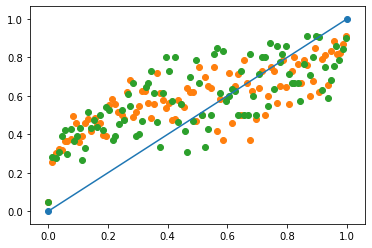

In [15]:
plt.scatter(scores_train, ctrs_train)
plt.scatter(scores_test, ctrs_test)
plt.scatter(scores_val, ctrs_val )

plt.plot([0,1], [0,1])
plt.show()

In [ ]:
plt.hist(model.predict(X_train) , bins=100)
plt.hist(model.predict(X_test) , bins=100)
plt.hist(model.predict(X_val) , bins=100)
plt.show()

In [ ]:
plt.scatter(scores_train, ctrs_train)
plt.scatter(scores_test, ctrs_test)
plt.scatter(scores_val, ctrs_val )

plt.plot([0,1], [0,1])
plt.show()

In [ ]:
plt.hist(model.predict(X_train) , bins=100)
plt.hist(model.predict(X_test) , bins=100)
plt.hist(model.predict(X_val) , bins=100)
plt.show()

In [ ]:
def post(scores, ctr_train):
    s_prev = np.array(scores)
    return s_prev / (s_prev  +  (1 - ctr_train) / ctr_train  * (1 - s_prev) )

In [ ]:
s_post_train = post(scores_train, ctr_train)
s_post_val = post(scores_val, ctr_train)
s_post_test = post(scores_test, ctr_train)

In [ ]:
plt.scatter(s_post_train, ctrs_train)
plt.scatter(s_post_test, ctrs_test)
plt.scatter(s_post_val, ctrs_val )

plt.plot([0,1], [0,1])
plt.show()